## Programming for Data Analysis - Project 2

#### Martin Cusack        

#### Student ID: G00239124


### Introduction

In this project, I will conduct analysis and investigation of a data set sourced from the UC Irvine Machine Learning Repository, containing data on Breast Cancer samples gathered by a team at the University of Wisconsin Hospitals and Clinics. The features of the data set are calculated from a fine needle aspirate (FNA) of a breast mass and describe characteristics of the relevant cell nuclei. From the resulting data, I will train a number of machine learning algorithms to assess their accuracy in determining the class of each sample.  I will also conduct a literature review on the classifiers and compare the results documented in various papers to my own findings.

In [8]:
# import Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as nei

In [11]:
# import Breast Cancer Wisconsin (Original) Data Set into a pandas data frame
df=pd.read_csv (r"C:\Users\cusac\OneDrive\Desktop\breast_cancer_bd.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [12]:
# display number of rows and columns
df.shape

(699, 11)

In [59]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
# show count of attributes in column "Class"
print(df['Class'].value_counts())

2    458
4    241
Name: Class, dtype: int64


In [30]:
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

### Breast Cancer Wisconsin (Original) Data Set

The data set which I will be investigating for this project was created at the University of Wisconsin Hospitals in Madison, Wisconsin, USA, by a team led by Dr. William Wolberg.  It is a multi-variate data set which is available in two different forms, **Original** and **Diagnostic**.  For the purposes of this project I chose to investigate the Original version.

As shown above, the Original Data Set has 699 rows and 11 columns, with 16 missing values.  The first column, **"Sample code number"**, is used solely for identification purposes and contains a 6 or 7 digit sample number.  The next 9 columns ("**Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses")** all refer to different measurements of breast cancer tissue samples and contain integer values ranging from 1 to 10. The final column ("Class") seperates the samples into either Class 2 (benign) or Class 4 (malignant).  As shown above using the .value_counts() function, the data set includes 458 instances of class 2 and 241 instances of class 4.

### Visualising the data

In [13]:
# remove first column as it does not contain any relevant info
df1 = df.drop(columns=['Sample code number'])

In [56]:
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


#### Histograms

<AxesSubplot:xlabel='Clump Thickness', ylabel='Count'>

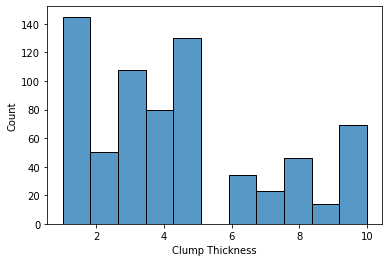

In [14]:
# create seaborn histogram of each column
sns.histplot(data=df1, x="Clump Thickness")

<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='Count'>

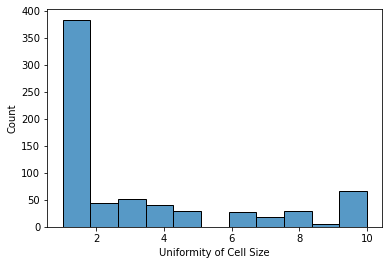

In [15]:
# create seaborn histogram of each column
sns.histplot(data=df1, x="Uniformity of Cell Size")

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Count'>

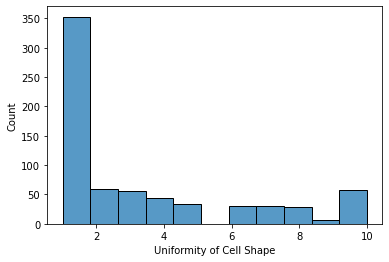

In [16]:
# create seaborn histogram of each column
sns.histplot(data=df1, x="Uniformity of Cell Shape")

<AxesSubplot:xlabel='Marginal Adhesion', ylabel='Count'>

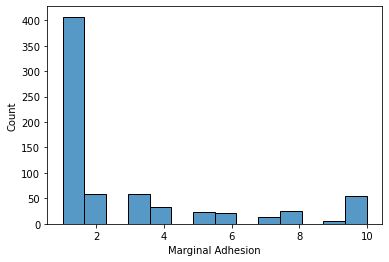

In [17]:
# create seaborn histogram of each column
sns.histplot(data=df1, x="Marginal Adhesion")

<AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='Count'>

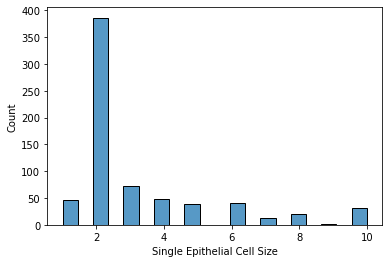

In [18]:
# create seaborn histogram of each column
sns.histplot(data = df1, x = "Single Epithelial Cell Size")

<AxesSubplot:xlabel='Bare Nuclei', ylabel='Count'>

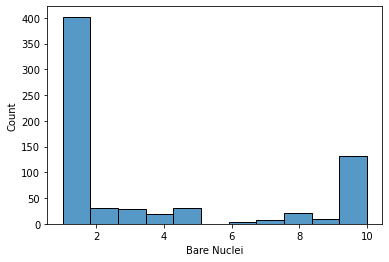

In [19]:
# create seaborn histogram of each column
sns.histplot(data = df1, x = "Bare Nuclei")

<AxesSubplot:xlabel='Bland Chromatin', ylabel='Count'>

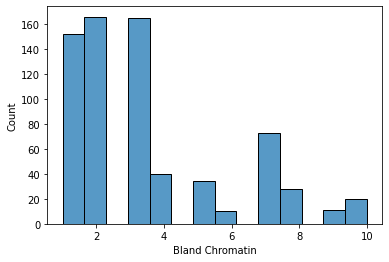

In [20]:
# create seaborn histogram of each column
sns.histplot(data = df1, x = "Bland Chromatin")

<AxesSubplot:xlabel='Normal Nucleoli', ylabel='Count'>

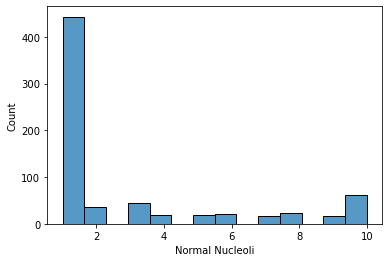

In [21]:
# create seaborn histogram of each column
sns.histplot(data = df1, x = "Normal Nucleoli")

#### Scatterplot

<AxesSubplot:xlabel='Clump Thickness', ylabel='Single Epithelial Cell Size'>

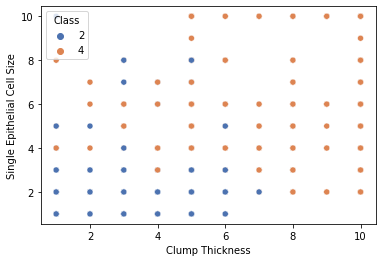

In [22]:
# investigate relationship between Clump Thickness and Single Epithelial Cell size with scatterplot
sns.scatterplot(x='Clump Thickness',y='Single Epithelial Cell Size', hue='Class', palette= "deep", data=df1)

As we can see there is a clear relationship between these two columns.  Since malignant tissue samples are larger due to their more aggressize growth rate, we see that the larger data points on the upper right of the plot are all of Class 4 (malignant), with larger clump thickness and cell size.

#### Pairplot

Pairplot : I used seaborn's pairplot function to create a grid displaying relationships between the columns **"Marginal Adhesion"**, **"Bland Chromatin"** and **"Normal Nucleoli"**.

In [90]:
df2 = df1.drop(columns=['Clump Thickness', 'Mitoses', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Uniformity of Cell Size', 'Uniformity of Cell Shape'])

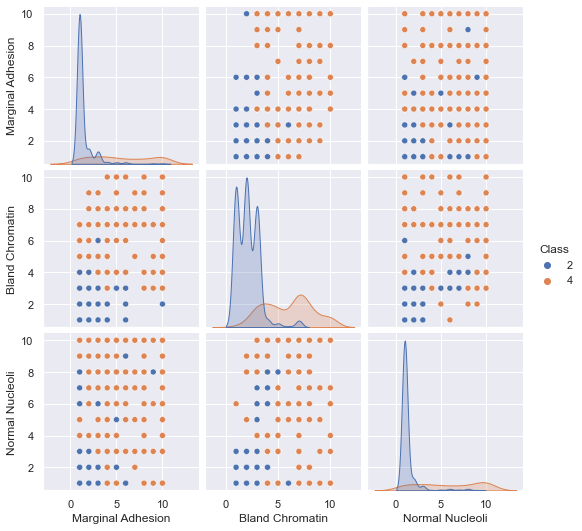

In [96]:
sns.pairplot(df2, hue = 'Class', palette= "deep")

As we can see again, the Class 4 malignant cells dominate the upper right space of each of the seperate scatterplots in the grid, with demonstrably higher measurements for Bland Chromatin, Normal Nucleoli and Marginal Adhesion than the samples which fall into the Class 2 benign cells.

### Machine Learning Algorithms - Nearest Neighbours

### Inputs and Outputs

In [14]:
inputs = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
outputs = df [['Class']]